<a href="https://colab.research.google.com/github/mostofa247/Machine-Learning-Project/blob/main/Heart_Disease_ML_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as xtricks

import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

from google.colab import files

In [36]:
df = pd.read_csv("heart_disease.csv")

df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [37]:
df.shape

(10000, 21)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [40]:
target_col = "Heart Disease Status"

numeric_cols = ["Age", "Blood Pressure", "Cholesterol Level", "Fasting Blood Sugar", "CRP Level"]

categorical_cols = ["Gender", "Exercise Habits", "Smoking", "Diabetes", "High Blood Pressure", "Low HDL Cholesterol", "High LDL Cholesterol", "Alcohol Consumption", "Stress Level", "Heart Disease Status"]

print(target_col)
print(numeric_cols)
print(categorical_cols)

Heart Disease Status
['Age', 'Blood Pressure', 'Cholesterol Level', 'Fasting Blood Sugar', 'CRP Level']
['Gender', 'Exercise Habits', 'Smoking', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Heart Disease Status']


In [41]:
df.isna().sum()


,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [42]:
df[numeric_cols].agg(["min", "max", "mean", "median"]).round(2).T

,min,max,mean,median
Age,18.0,80.0,49.30,49.00
Blood Pressure,120.0,180.0,149.76,150.00
Cholesterol Level,150.0,300.0,225.43,226.00
Fasting Blood Sugar,80.0,160.0,120.14,120.00
CRP Level,0.0,15.0,7.47,7.47


In [43]:
for c in categorical_cols:
  print(c, df[c].unique())

Gender ['Male' 'Female' nan]
Exercise Habits ['High' 'Low' 'Medium' nan]
Smoking ['Yes' 'No' nan]
Diabetes ['No' 'Yes' nan]
High Blood Pressure ['Yes' 'No' nan]
Low HDL Cholesterol ['Yes' 'No' nan]
High LDL Cholesterol ['No' 'Yes' nan]
Alcohol Consumption ['High' 'Medium' 'Low' nan]
Stress Level ['Medium' 'High' 'Low' nan]
Heart Disease Status ['No' 'Yes']


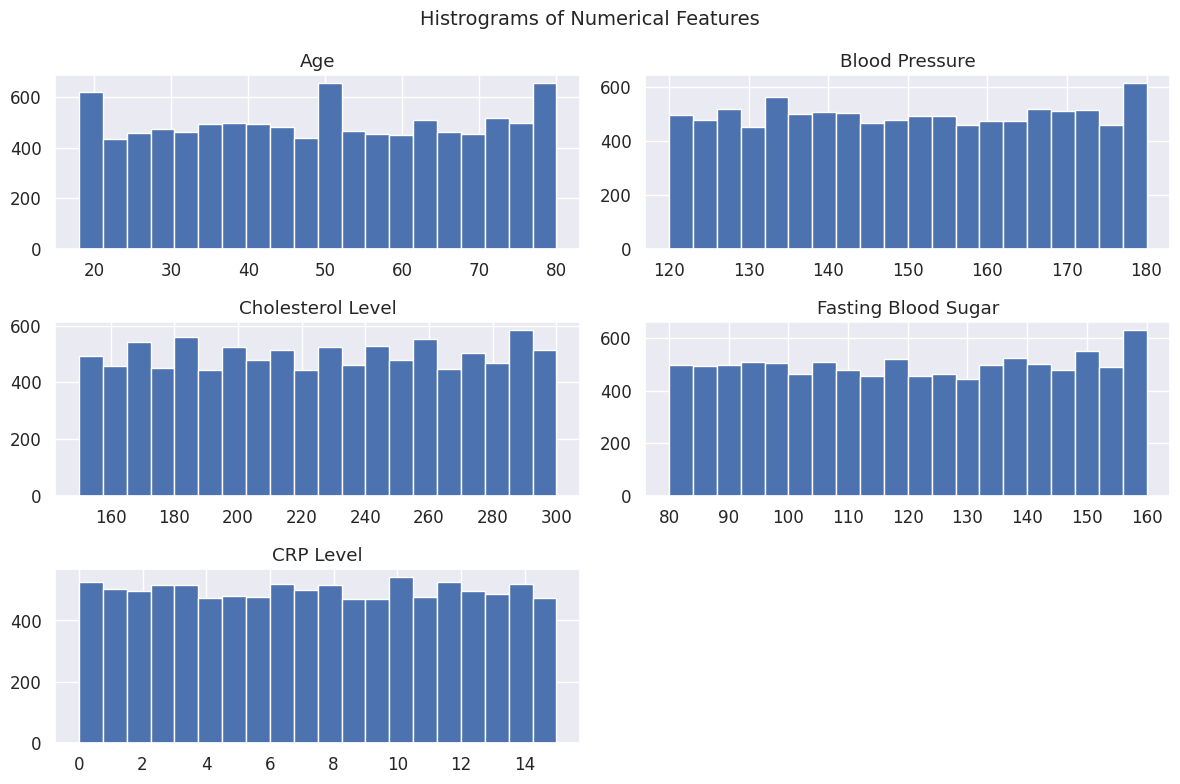

In [44]:
df[numeric_cols].hist(bins = 20, figsize=(12,8))
plt.suptitle("Histrograms of Numerical Features", fontsize = 14)
plt.tight_layout()
plt.show()

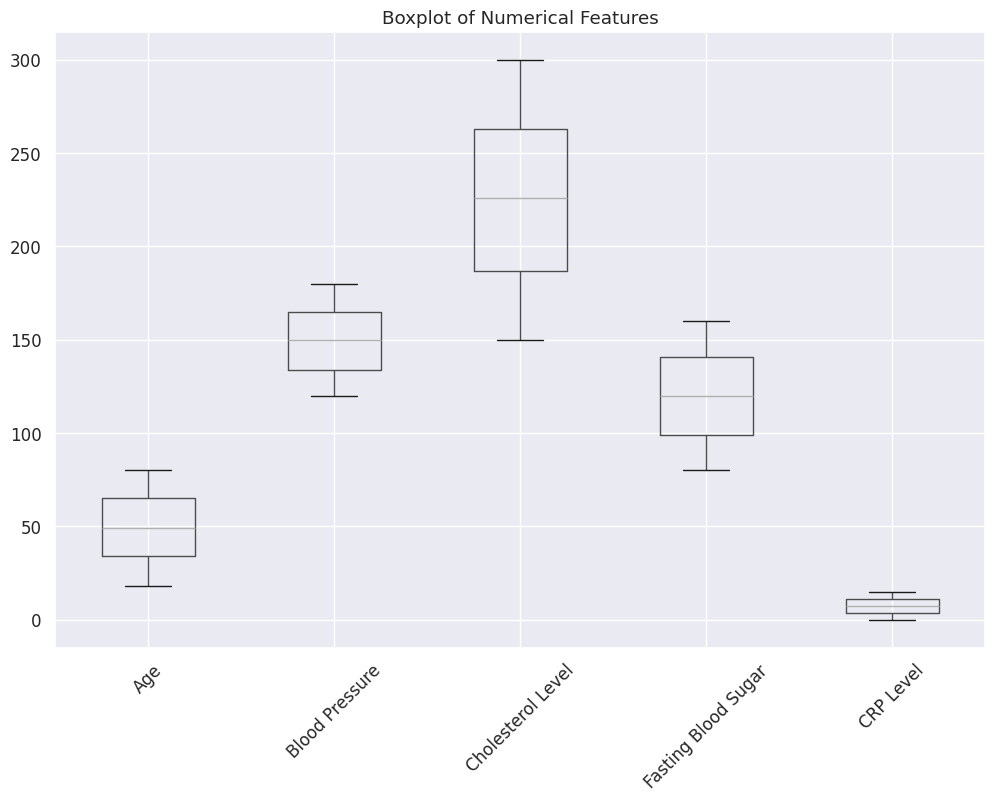

In [45]:
plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

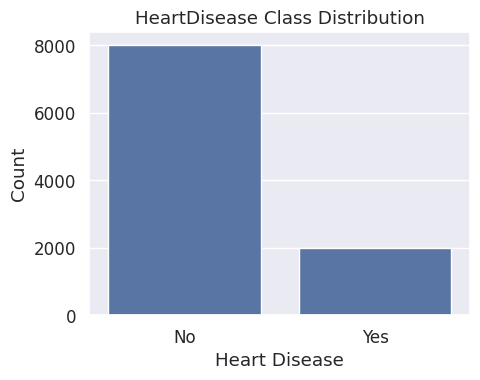

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("HeartDisease Class Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [47]:
df[target_col].value_counts(normalize=True)

,proportion
Heart Disease Status,
No,0.8
Yes,0.2


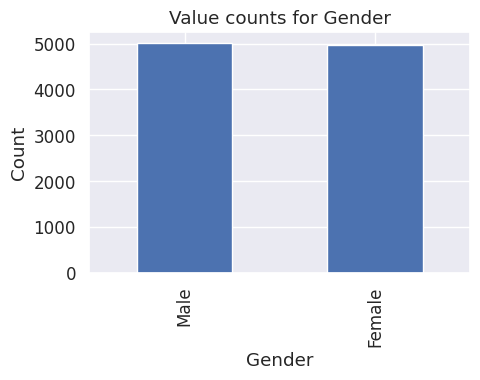

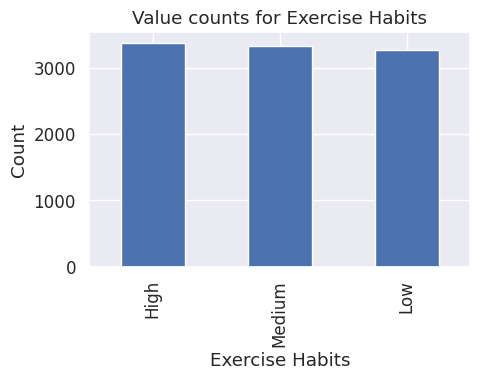

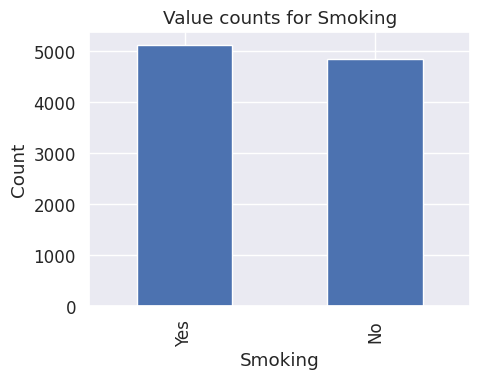

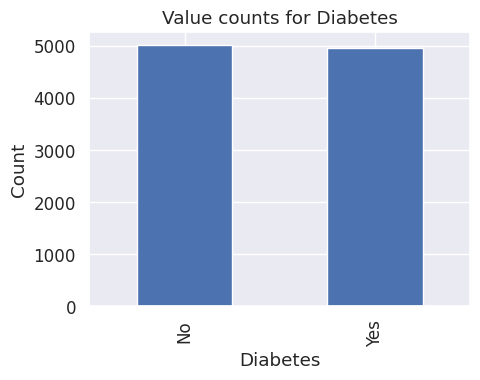

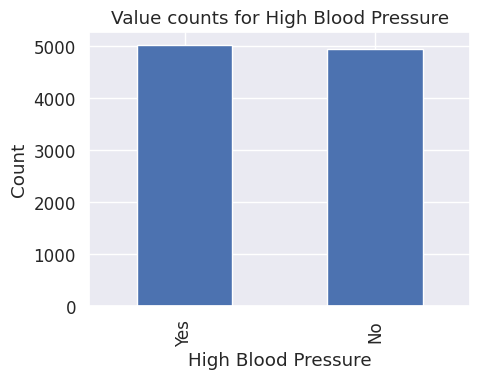

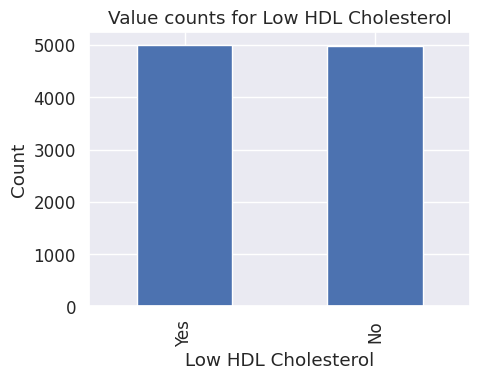

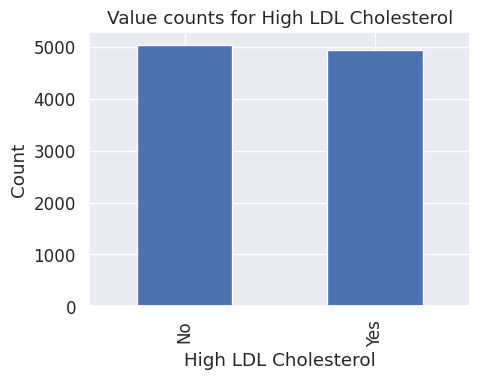

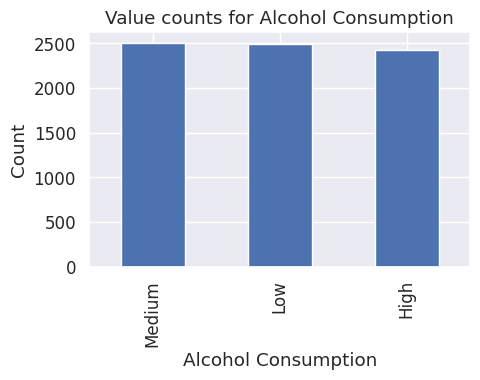

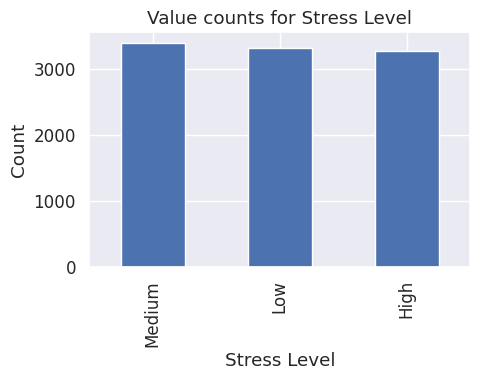

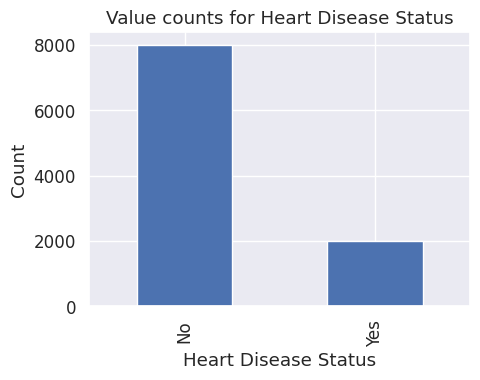

In [48]:
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

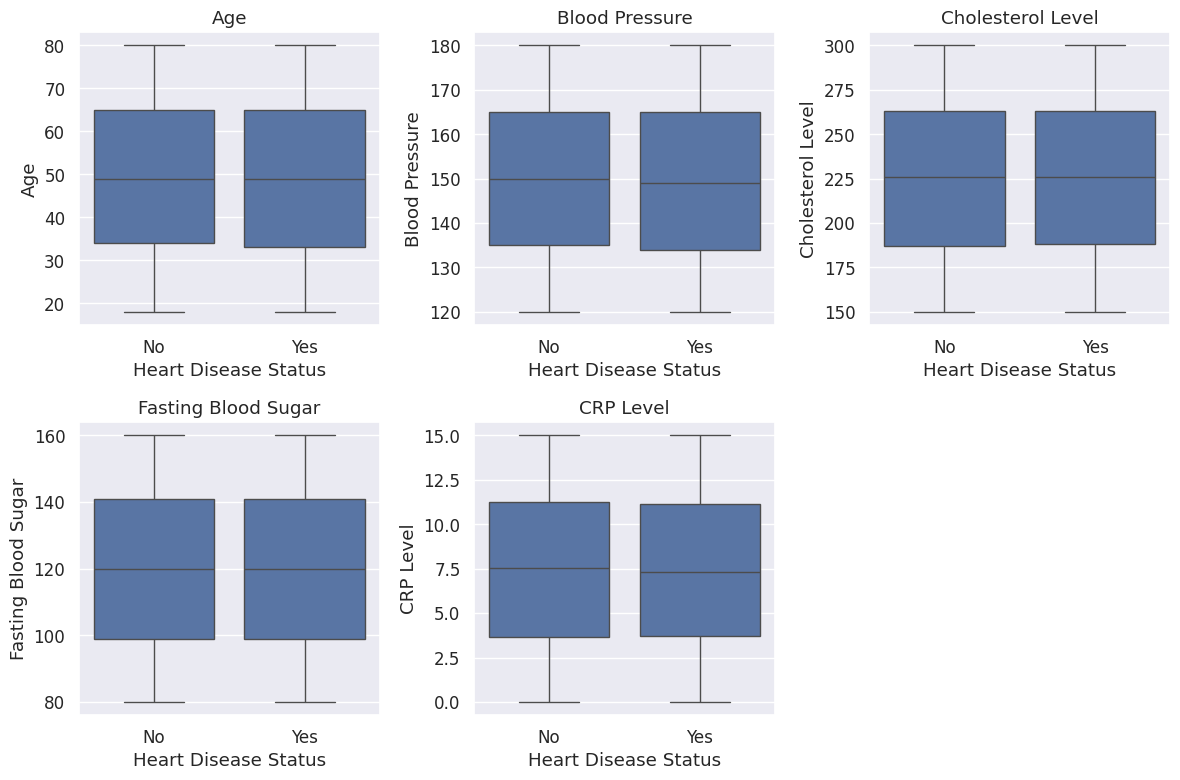

In [49]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(x=df[target_col], y=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

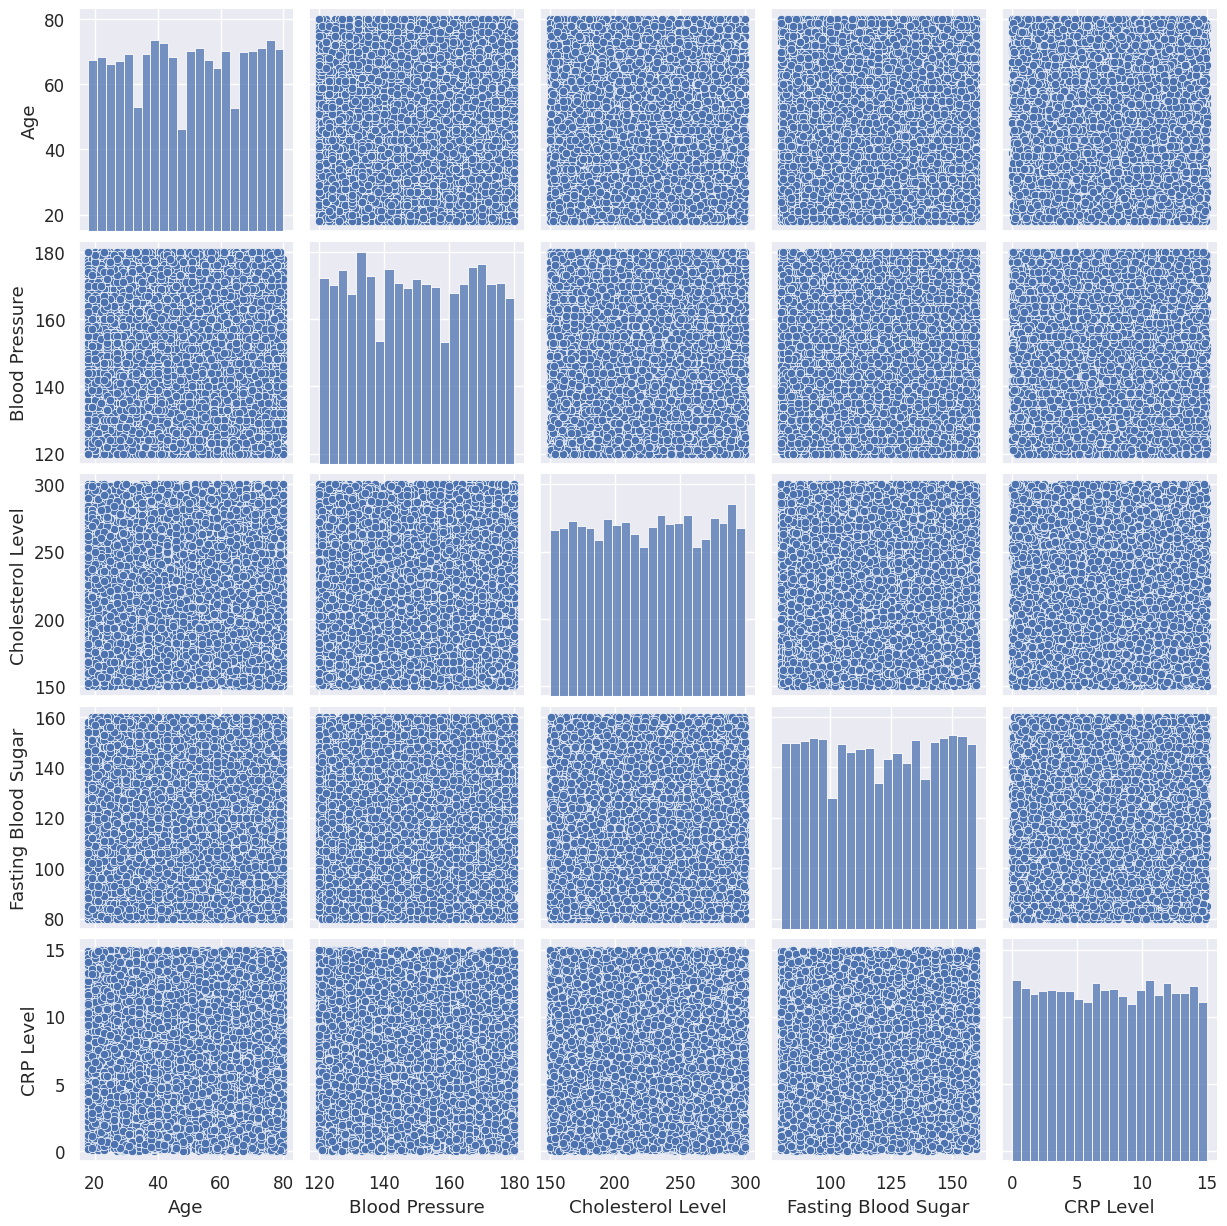

In [50]:
sns.pairplot(df[numeric_cols], diag_kind="hist")
plt.show()


 Proportion of HeartDisease within Gender


Heart Disease Status,No,Yes
Gender,,
Female,0.793090,0.206910
Male,0.806316,0.193684


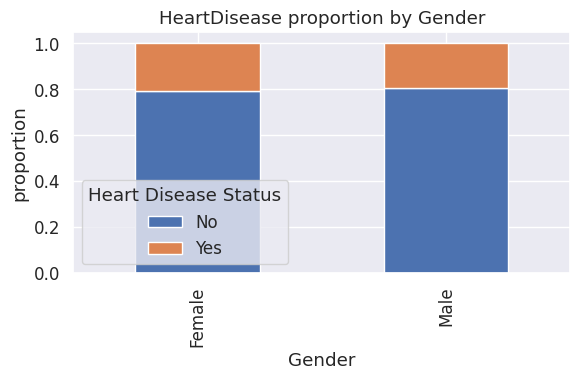


 Proportion of HeartDisease within Exercise Habits


Heart Disease Status,No,Yes
Exercise Habits,,
High,0.799822,0.200178
Low,0.802813,0.197187
Medium,0.796218,0.203782


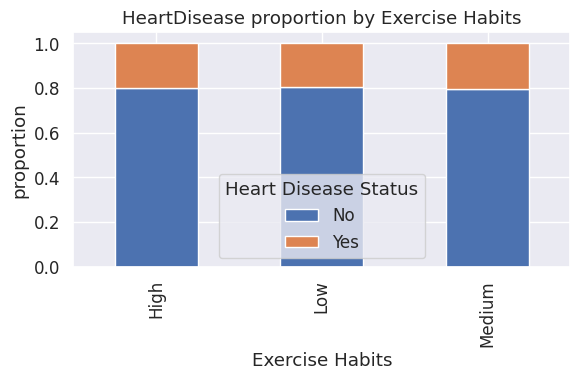


 Proportion of HeartDisease within Smoking


Heart Disease Status,No,Yes
Smoking,,
No,0.801113,0.198887
Yes,0.799141,0.200859


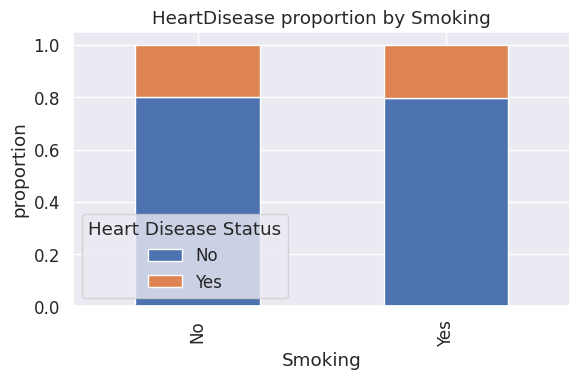


 Proportion of HeartDisease within Diabetes


Heart Disease Status,No,Yes
Diabetes,,
No,0.798924,0.201076
Yes,0.801090,0.198910


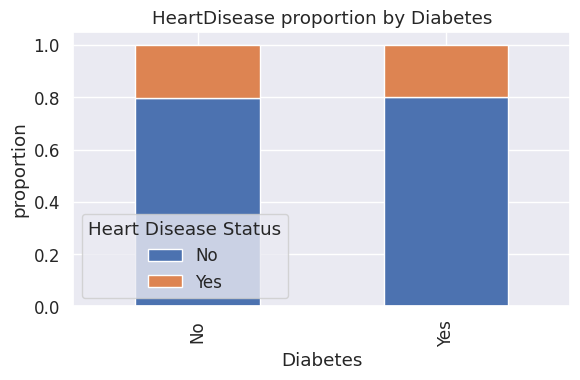


 Proportion of HeartDisease within High Blood Pressure


Heart Disease Status,No,Yes
High Blood Pressure,,
No,0.800889,0.199111
Yes,0.799084,0.200916


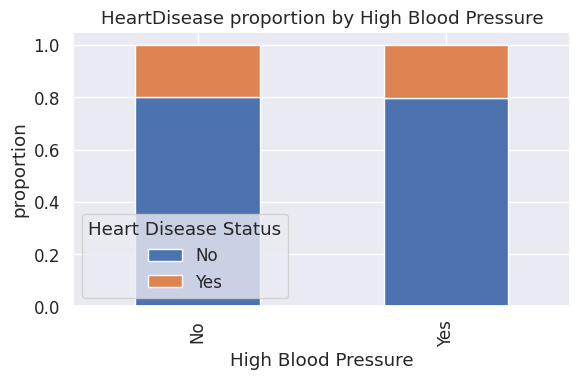


 Proportion of HeartDisease within Low HDL Cholesterol


Heart Disease Status,No,Yes
Low HDL Cholesterol,,
No,0.797588,0.202412
Yes,0.802000,0.198000


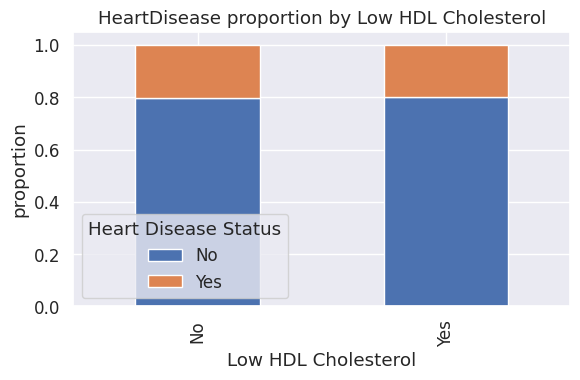


 Proportion of HeartDisease within High LDL Cholesterol


Heart Disease Status,No,Yes
High LDL Cholesterol,,
No,0.803018,0.196982
Yes,0.796679,0.203321


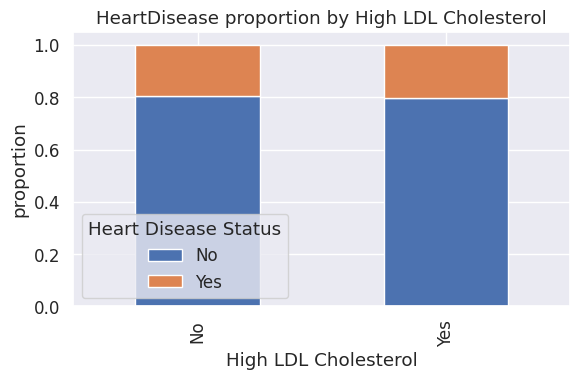


 Proportion of HeartDisease within Alcohol Consumption


Heart Disease Status,No,Yes
Alcohol Consumption,,
High,0.79019,0.20981
Low,0.79582,0.20418
Medium,0.80560,0.19440


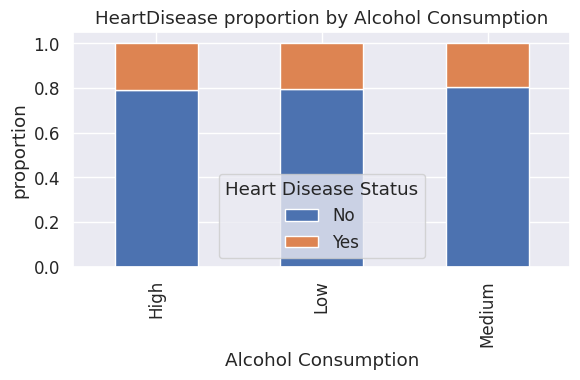


 Proportion of HeartDisease within Stress Level


Heart Disease Status,No,Yes
Stress Level,,
High,0.801590,0.198410
Low,0.812651,0.187349
Medium,0.785651,0.214349


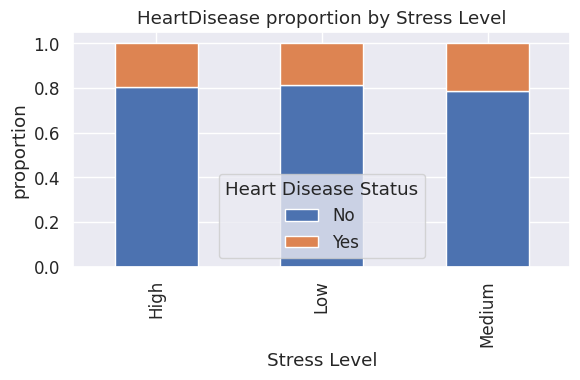


 Proportion of HeartDisease within Heart Disease Status


Heart Disease Status,No,Yes
Heart Disease Status,,
No,1.0,0.0
Yes,0.0,1.0


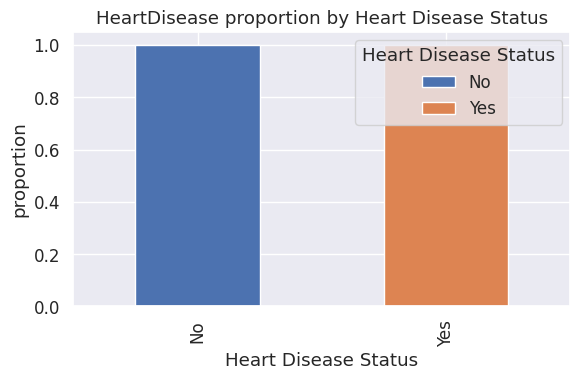

In [52]:

for c in categorical_cols:
  ct = pd.crosstab(df[c], df[target_col], normalize="index")
  print(f"\n Proportion of HeartDisease within {c}")
  display(ct)

  ct.plot(kind="bar", stacked=True, figsize=(6,4))
  plt.title(f"HeartDisease proportion by {c}")
  plt.ylabel("proportion")
  plt.tight_layout()
  plt.show()